In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns;

sns.set()
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import LightSource

show_fig = 1
plt.close('all')

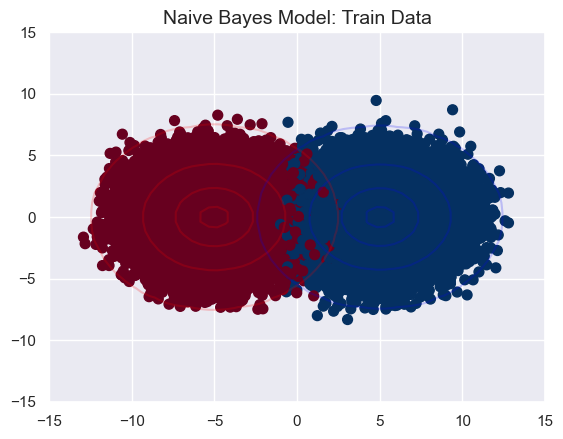

In [2]:
centers = [[-5, 0], [5, 0]]
X, y = make_blobs(100000, 2, centers=centers, random_state=2, cluster_std=2.0)
xlim = (-15, 15)
ylim = (-15, 15)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)

if show_fig:
    fig, ax = plt.subplots()

    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
    ax.set_title('Naive Bayes Model: Train Data', size=14)

    Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
    mu_list = np.empty((0, 2), dtype='float64');
    std_list = np.empty((0, 2), dtype='float64');
    for label, color in enumerate(['red', 'blue']):
        mask = (y == label)
        mu, std = X[mask].mean(0), X[mask].std(0)
        mu_list = np.vstack((mu_list, mu))
        std_list = np.vstack((std_list, std))
        P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
        Pm = np.ma.masked_array(P, P < 0.03)
        ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                      cmap=color.title() + 's')
        ax.contour(xx, yy, P.reshape(xx.shape),
                   levels=[0.001, 0.1, 0.5, 0.9],
                   colors=color, alpha=0.2)

    ax.set(xlim=xlim, ylim=ylim)
    fig.savefig('gaussian-NB-eq-Train_data.png')

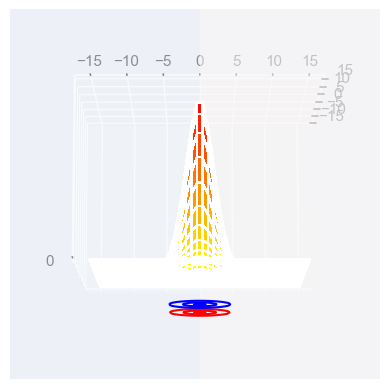

In [4]:
fig = plt.figure()
# ax = fig.gca(projection='3d')
#ls = LightSource(azdeg=0, altdeg=65)
ax = fig.add_subplot(111, projection='3d')
for label, color in enumerate(['red', 'blue']):
        mask = (y == label)
        mu, std = X[mask].mean(0), X[mask].std(0)
        Pm = np.ma.masked_array(P, P < 0.03)
        P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
       # rgb = ls.shade(P.reshape(xx.shape), plt.cm.RdYlBu)
        ax.plot_surface(xx,yy,P.reshape(xx.shape), rstride=1, cstride=1, linewidth=1, antialiased=False,
                cmap="autumn_r")
        ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
        ax.contour(xx, yy, P.reshape(xx.shape),
                   levels=[0.1, 0.5, 0.9],colors=color, linestyles="solid",offset=-0.2)#
                   #colors=color, alpha=0.2)
ax.set_zlim(0,1)
ax.set_zticks(np.linspace(0,0.1,1))
ax.view_init(-10, 0)

# for angle in range(0, 360,5):
#     ax.view_init(-10, angle)
#     plt.draw()
#     plt.pause(.001)
plt.show()

In [5]:
model = GaussianNB()
model.fit(X, y);

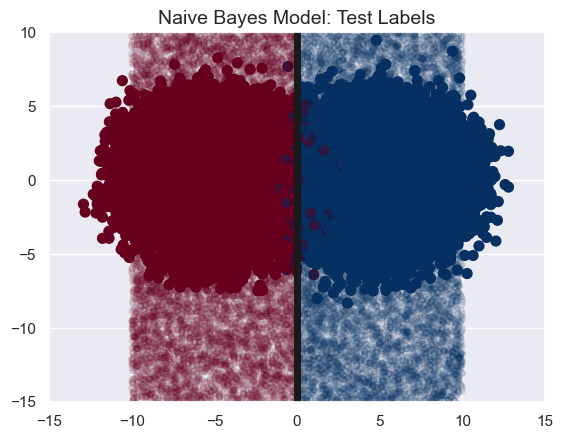

In [6]:
rng = np.random.RandomState(0)
Xnew = [-10, -15] + [20, 25] * rng.rand(20000, 2)  #[-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

if show_fig:
    fig, ax = plt.subplots()
    ax.set_title('Naive Bayes Model: Test Labels', size=14)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
    #lim = plt.axis()
    plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
    xlim = (-15, 15)
    ylim = (-15, 10)
    xval = (centers[0][0] + centers[1][0]) / 2
    plt.plot([xval, xval], [ylim[0], ylim[1]], 'k-', lw=5)

    ax.set(xlim=xlim, ylim=ylim)
    fig.savefig('gaussian-NB-eq-Test_data.png')